In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
traindata=datagen.flow_from_directory('/content/drive/MyDrive/flower_photos',target_size=(128, 128),batch_size=32,class_mode='categorical',subset='training')
testdata= datagen.flow_from_directory('/content/drive/MyDrive/flower_photos',target_size=(128, 128),batch_size=32,class_mode='categorical',subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
class_indices = traindata.class_indices
for class_name, index in class_indices.items():
  class_count = len(traindata.labels[traindata.labels == index])
  print(f"Class '{class_name}': {class_count} images")

Class 'daisy': 507 images
Class 'dandelion': 719 images
Class 'roses': 513 images
Class 'sunflowers': 560 images
Class 'tulips': 640 images


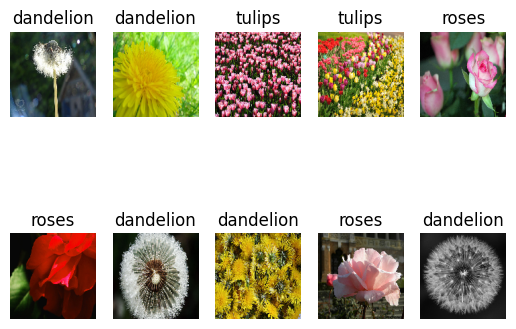

In [ ]:
images, labels = next(traindata)
plt.figure()
for i in range(10):
  plt.subplot(2,5,i+1) # Adjust subplot grid as needed
  plt.imshow(images[i])
  plt.title(list(class_indices.keys())[list(class_indices.values()).index(np.argmax(labels[i]))]) # Get class name from label
  plt.axis('off')
plt.show()

In [ ]:
class_indices = testdata.class_indices
for class_name, index in class_indices.items():
  class_count = len(testdata.labels[testdata.labels == index])
  print(f"Class '{class_name}': {class_count} images")

Class 'daisy': 126 images
Class 'dandelion': 179 images
Class 'roses': 128 images
Class 'sunflowers': 139 images
Class 'tulips': 159 images


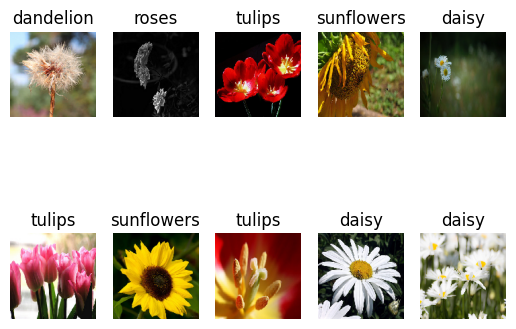

In [ ]:
images, labels = next(testdata)
plt.figure()
for i in range(10):
  plt.subplot(2,5,i+1) # Adjust subplot grid as needed
  plt.imshow(images[i])
  plt.title(list(class_indices.keys())[list(class_indices.values()).index(np.argmax(labels[i]))]) # Get class name from label
  plt.axis('off')
plt.show()

In [ ]:
VGG=tf.keras.applications.vgg19.VGG19(input_shape=(224,224,3),include_top=False,weights='imagenet')
VGG.trainable=False

80134624/80134624 [==============================] - 5s 0us/step


In [ ]:
model=keras.Sequential([
    VGG,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 256)               65792     
                                                                 
 dense_11 (Dense)            (None, 5)                 1285      
                                                      

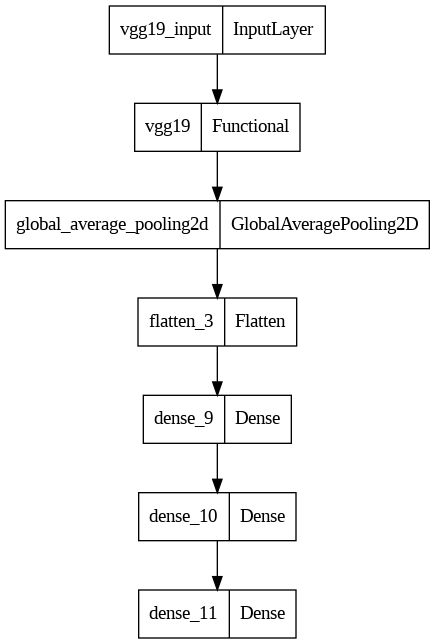

In [ ]:
keras.utils.plot_model(model)

In [ ]:
hist=model.fit_generator(steps_per_epoch=15,generator=traindata,validation_data=testdata,validation_steps=15, epochs=10)
model.save('vgg19.h5')

Epoch 1/10


<ipython-input-33-f13266d1d045>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=15,generator=traindata,validation_data=testdata,validation_steps=15, epochs=10)


15/15 [==============================] - 5s 368ms/step - loss: 0.6373 - accuracy: 0.7625 - val_loss: 0.7179 - val_accuracy: 0.7417
Epoch 2/10
15/15 [==============================] - 8s 537ms/step - loss: 0.5924 - accuracy: 0.7853 - val_loss: 0.6623 - val_accuracy: 0.7667
Epoch 3/10
15/15 [==============================] - 8s 523ms/step - loss: 0.5812 - accuracy: 0.8000 - val_loss: 0.6985 - val_accuracy: 0.7479
Epoch 4/10
15/15 [==============================] - 5s 337ms/step - loss: 0.6318 - accuracy: 0.7729 - val_loss: 0.7252 - val_accuracy: 0.7333
Epoch 5/10
15/15 [==============================] - 7s 519ms/step - loss: 0.5648 - accuracy: 0.8000 - val_loss: 0.6936 - val_accuracy: 0.7479
Epoch 6/10
15/15 [==============================] - 5s 348ms/step - loss: 0.6470 - accuracy: 0.7667 - val_loss: 0.7157 - val_accuracy: 0.7333
Epoch 7/10
15/15 [==============================] - 6s 412ms/step - loss: 0.5667 - accuracy: 0.7917 - val_loss: 0.6391 - val_accuracy: 0.7563
Epoch 8/10
15/15 

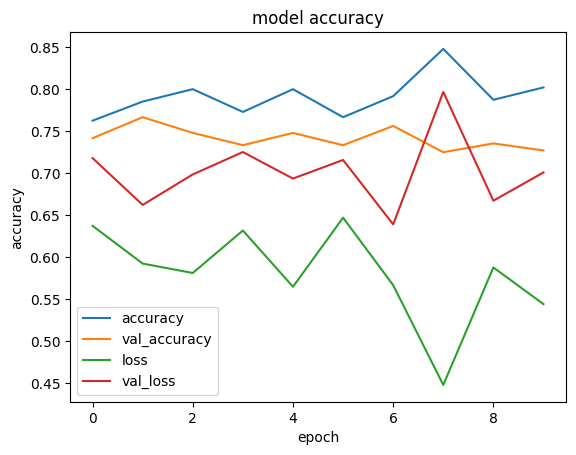

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='lower left')
plt.show()

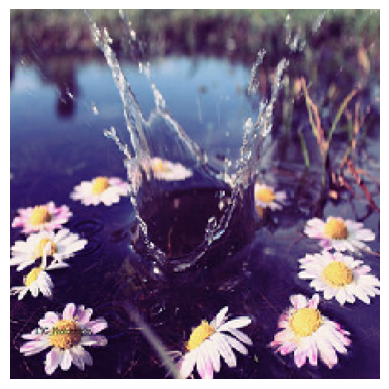

1/1 [==============================] - 1s 1s/step
Predicted class: daisy


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
model = load_model('vgg19.h5')
img_index = 2
img_path = testdata.filepaths[img_index]
img = image.load_img(img_path, target_size=(224,224))
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
class_labels = list(testdata.class_indices.keys())
predicted_class = class_labels[np.argmax(predictions)]
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 158ms/step
Predicted class: dandelion


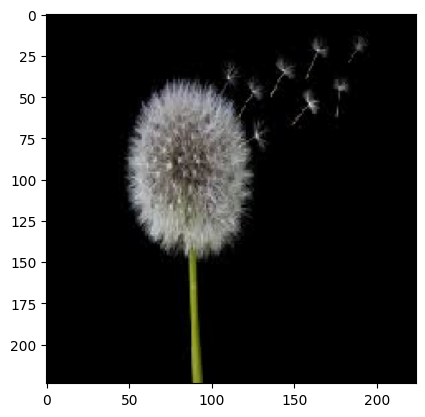

In [ ]:
from keras.models import load_model
model = load_model('vgg19.h5')
img_path ='/content/dand.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0
predictions = model.predict(img_array)
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
predicted_class = classes[np.argmax(predictions)]
print("Predicted class:", predicted_class)